# Bayesian theory and computation

# Project 1

### Importing Libraries 

In [22]:
from warnings import filterwarnings

import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
filterwarnings("ignore")

# Seed for reproducibility
np.random.seed(69)

# Float precision while printing
flt_prec = 4

### Loading the Data

In [23]:
df=pd.read_csv("white_wine.csv")
df.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [13]:
# Extracting column of interest
data=df.loc[:,'fixed acidity']
data.head()


0    7.0
1    6.3
2    8.1
3    7.2
4    7.2
Name: fixed acidity, dtype: float64

In [14]:
# splitting prior and likelihood data
prior=data.loc[:3000]
likelihood=data.loc[3000:]

In [15]:
#sample variance calculator
def sample_variance(data):
    n = len(data)
    x_bar= np.mean(data)
    variance=(np.sum((data-x_bar)**2))/(n-1) 
    return variance

### Bayesian Analysis and Data Modelling



We model the data assuming it follows a normal distribution with known variance. Hence, the data is modeled as:
$X | \mu \sim N(\mu, \sigma^2)$
where $ \sigma^2$ is known.

$f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$

$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$



The likelihood function, given the sample  $\mathbf{x} = (x_1, x_2, \dots, x_n)$, is:

$ L(\mu | \mathbf{x}) = \prod_{i=1}^n f(x_i | \mu) \propto \exp\left(-\frac{\sum_{i=1}^n (x_i - \mu)^2}{2\sigma^2}\right) $.


Assume a normal prior for $\mu $:

$\mu \sim N(\mu_0, \tau^2)$.


The posterior distribution for $\mu $ is:

$P(\mu | \mathbf{x}) \propto L(\mu | \mathbf{x}) \cdot P(\mu)$.


Substituting the likelihood and prior, we get:

$P(\mu | \mathbf{x}) \propto \exp\left(-\frac{\sum_{i=1}^n (x_i - \mu)^2}{2\sigma^2}\right) \cdot \exp\left(-\frac{(\mu - \mu_0)^2}{2\tau^2}\right)$.


Simplifying the exponent terms:

$P(\mu | \mathbf{x}) \sim N\left(\frac{\frac{\mu_0}{\tau^2} + \frac{n\bar{x}}{\sigma^2}}{\frac{1}{\tau^2} + \frac{n}{\sigma^2}}, \frac{1}{\frac{1}{\tau^2} + \frac{n}{\sigma^2}}\right)$,

where $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$.




### Finding Parameters 

In [21]:
import numpy as np
#finding parameters of prior
#using MLE
prior_mean= np.mean(prior)
prior_variance=sample_variance(prior)
print('prior mean:',prior_mean)
print('prior variance:',prior_variance)

#sample variance for likelihood
likelihood_variance=sample_variance(likelihood)
likelihood_mean=np.mean(likelihood)
print('likelihood variance :',likelihood_variance)
print('likelihood sample mean :',likelihood_mean)

prior mean: 7.045901366211263
prior variance: 0.7380598622681327
likelihood variance : 0.5219045128656917
likelihood sample mean : 6.552528977871444


In [20]:
post_var=1/((1/prior_variance)+(1/likelihood_variance))
post_mean= ((prior_mean/prior_variance) + (likelihood_mean/likelihood_variance))*post_var
print('Posterior Mean :',post_mean)
print('Posterior Variance :',post_var)

Posterior Mean : 6.756894498897009
Posterior Variance : 0.3057203683571263


### Plots

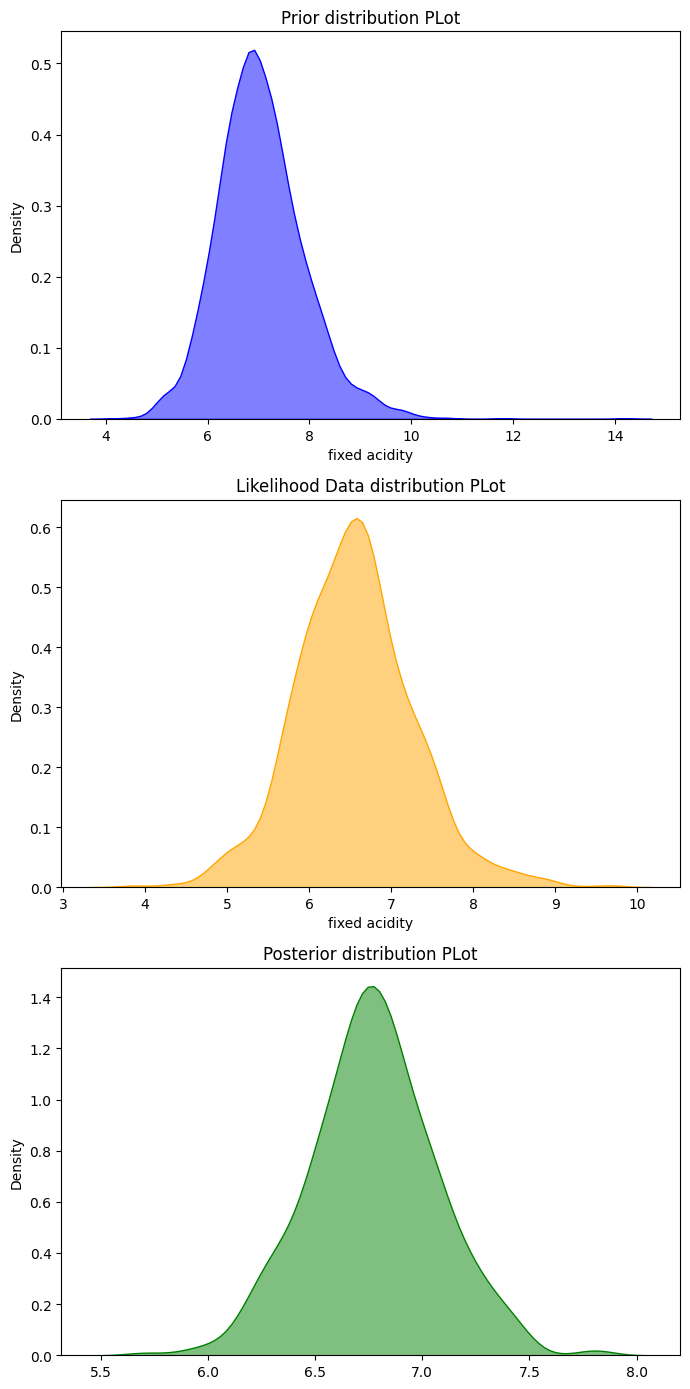

In [28]:
fig, ax = plt.subplots(3,1, figsize=(7, 14))
sns.kdeplot(data=prior, ax=ax[0],color='blue',alpha=0.5,fill=True,gridsize=100)
ax[0].set_title('Prior distribution PLot')
sns.kdeplot(data=likelihood, ax=ax[1],color='orange',alpha=0.5,fill=True,gridsize=100)
ax[1].set_title('Likelihood Data distribution PLot')
sns.kdeplot(data=np.random.normal(post_mean,post_var,500), ax=ax[2],color='green',alpha=0.5,fill=True,gridsize=100)
ax[2].set_title('Posterior distribution PLot')
plt.tight_layout()
plt.show()

#### Combined Plot

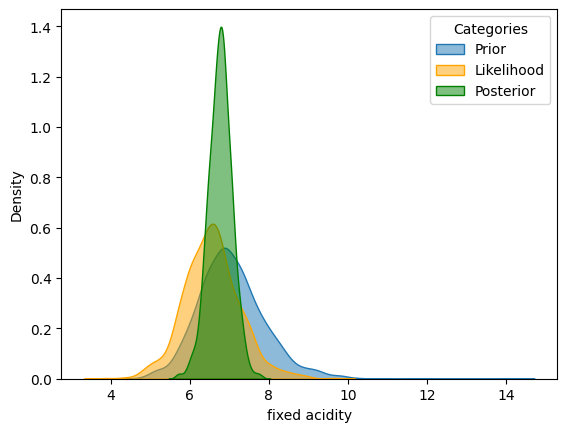

In [29]:
sns.kdeplot(prior,fill=True,alpha=0.5,label='Prior')
sns.kdeplot(likelihood,color="orange",fill=True,alpha=0.5,label='Likelihood')
sns.kdeplot(data=np.random.normal(post_mean,post_var,500),color='green',fill=True,alpha=0.5,label='Posterior')
plt.legend(title='Categories')
plt.show()
